In [538]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

In [539]:
def move(n, i_d, j_d, cans_d):
    fit = 0
    if n == 6: #MoveRandom
        r = np.random.rand()
        if r <= 0.25:
            n = 0
        elif r<= 0.5:
            n = 1
        elif r <=0.75:
            n = 2
        else:
            n = 3
    if n == 0: #MoveNorth
        i_d = i_d-1
        if i_d<0:
            fit = -5
            i_d = i_d+1
    elif n == 1: #MoveSouth
        i_d = i_d+1
        if i_d>9:
            fit = -5
            i_d = i_d-1
    elif n == 2: #MoveWest
        j_d = j_d-1
        if j_d<0:
            fit = -5
            j_d = j_d+1
    elif n == 3: #MoveEast
        j_d = j_d+1
        if j_d>9:
            fit = -5
            j_d = j_d-1
    elif n == 4: #StayPut
        pass
    elif n == 5: #PickUp
        if cans_d[i,j] == 1:
            fit = 10
            cans_d[i,j] = 0
        else:
            fit = -1
    return i_d, j_d, fit, cans_d[i,j]


In [540]:
def choose_gen(i, j, cans):
    gidx = 0 #index of gene
    # up * 3^4 + down * 3^3 + left * 3^2 + right * 3^1 + cur * 3^0 = index of gene
    # empty = 0, can = 1, wall = 2
    if i - 1 < 0:
        gidx += 2 * 3**4
    elif cans[i-1,j] == 1:
        gidx += 1 * 3**4
    if i + 1 > 9:
        gidx += 2 * 3**3
    elif cans[i+1,j] == 1:
        gidx += 1 * 3**3
    if j - 1 < 0:
        gidx += 2 * 3**2
    elif cans[i,j-1] == 1:
        gidx += 1 * 3**2
    if j + 1 > 9:
        gidx += 2 * 3**1
    elif cans[i,j+1] == 1:
        gidx += 1 * 3**1
    if cans[i,j] == 1:
        gidx += 1 * 3**0
    return gidx
        

In [541]:
def init_cans():
    cans_d = -np.ones((10,10))
    for ii in range(10):
        for jj in range(10):
            random = np.random.rand()
            if random <=0.5:          
                cans_d[ii,jj] = 0
            else:
                cans_d[ii,jj] = 1
    return cans_d

In [542]:
def init_individual():
    individual_d = -np.ones(243)
    for iii in range(243):
        individual_d[iii] = random.randint(0,6)
    return individual_d

In [543]:
def mutations(ind, small_prob):
    randnumber = random.randint(0,242)
    #"with a small probability"
    for q in range(randnumber):
        r = np.random.rand()
        if r<=small_prob:
            s = random.randint(0,242)
            #print(s, "mut")
            #print(ind[s], "before")
            ind[s] = random.randint(0,6)
            #print(ind[s], "after")
    return ind

In [544]:
def parents_choice(inds_d, w):
    """
    idxes = np.arange(inds_d.shape[0])
    idx_1 = random.choices(idxes, weights = w, k = 1)
    idx_2 = random.choices(idxes, weights = w, k = 1)
    while idx_1 == idx_2:
        idx_2 = random.choices(idxes, weights = w, k = 1)
    return inds_d[idx_1], inds_d[idx_2], w[idx_1], w[idx_2]
    """
    """
    maximum = np.amax(w)
    probs = scipy.stats.norm(maximum, 1).pdf([w])
    idxes = np.arange(inds.shape[0])
    idx1, idx2 = np.random.choice(idxes, size = 2, replace = False, p = np.array(probs)[0])
    return inds[idx1], inds[idx2]
    """
    """
    for i in range(len(w)):
        if w[i]<0:           
            w[i] = np.abs(1/w[i])
    """
    idxes = np.arange(inds_d.shape[0])
    mean = np.median(w)
    for i in range(len(w)):
        if w[i] < mean:
            w[i] = 0
    norm_fitn = np.sum(w)
    w = w/norm_fitn
    idx_1 = random.choices(idxes, weights = w, k = 1)
    idx_2 = random.choices(idxes, weights = w, k = 1)
    while idx_1 == idx_2:
        idx_2 = random.choices(idxes, weights = w, k = 1)
    return inds_d[idx_1], inds_d[idx_2]
    
    

In [545]:
individual = init_individual()

In [546]:
individual

array([5., 2., 6., 5., 0., 2., 6., 4., 4., 1., 2., 2., 6., 4., 2., 2., 1.,
       1., 3., 1., 4., 5., 2., 3., 2., 5., 2., 4., 1., 6., 1., 2., 5., 1.,
       0., 1., 3., 5., 2., 0., 6., 0., 3., 4., 1., 3., 3., 6., 1., 2., 6.,
       0., 2., 4., 6., 2., 1., 1., 3., 3., 1., 2., 4., 4., 5., 5., 2., 2.,
       6., 0., 6., 3., 6., 6., 2., 3., 2., 2., 1., 6., 5., 6., 2., 5., 5.,
       2., 2., 4., 3., 2., 4., 2., 2., 5., 0., 5., 0., 3., 3., 6., 3., 1.,
       3., 5., 5., 0., 2., 4., 6., 0., 3., 5., 6., 3., 6., 2., 1., 3., 4.,
       1., 0., 1., 3., 1., 6., 5., 2., 1., 2., 4., 4., 4., 1., 6., 5., 4.,
       1., 5., 3., 4., 6., 2., 5., 1., 3., 6., 4., 1., 6., 0., 0., 1., 0.,
       6., 0., 0., 0., 0., 6., 2., 2., 1., 0., 1., 2., 4., 0., 2., 1., 2.,
       5., 4., 5., 0., 0., 2., 0., 1., 5., 6., 2., 2., 0., 4., 2., 2., 1.,
       1., 6., 1., 2., 3., 5., 5., 5., 2., 5., 2., 0., 6., 1., 1., 6., 6.,
       0., 5., 3., 6., 3., 0., 0., 1., 2., 5., 0., 4., 6., 1., 2., 5., 5.,
       4., 0., 2., 1., 1.

In [547]:
cans = init_cans()

In [548]:
cans

array([[1., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1., 1., 1., 1., 0.],
       [1., 0., 1., 1., 0., 1., 1., 1., 0., 1.],
       [1., 0., 1., 1., 0., 1., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 1., 0., 1., 1., 1.],
       [1., 0., 0., 0., 0., 1., 1., 0., 1., 1.],
       [1., 1., 0., 1., 0., 0., 0., 1., 1., 1.],
       [1., 0., 1., 0., 1., 1., 0., 0., 0., 0.],
       [0., 1., 0., 1., 1., 0., 1., 0., 1., 1.],
       [1., 0., 0., 1., 0., 1., 1., 0., 0., 1.]])

In [549]:
generations = 1000
mutation_param = 0.03

In [550]:
best_g_fitness = -np.ones(generations)
fitnesses = -np.ones(200)
inds = np.zeros((200,243))
for m in range(200): #200 individuals in one generation
    individual = init_individual()
    inds[m] = individual
    fitness_sum = np.zeros(100)
    for c in range(100): #100 cleaning sessions
        cans = init_cans()
        i = 0 #initial (i - строка)
        j = 0 #initial (j - столбец)
        fitness = np.zeros(200)
        for k in range(200): #200 actions in one cleaning
            idx = choose_gen(i,j,cans)
            #print(idx)
            #print ("шаг", k, "координаты", i, j, "заполнение", cans[i,j])
            i_new, j_new, fitness[k], cans[i,j] = move(individual[idx], i, j, cans)
            i = i_new
            j = j_new
            #print ("индекс", idx, "ход", individual[idx])
            #print("шаг", k, "координаты", i, j, "заполнение", cans[i,j], "fitness", fitness[k])
        fitness_sum[c] = np.sum(fitness)
    fitnesses[m] = np.mean(fitness_sum)
best_g_fitness[0] = np.amax(fitnesses)

In [551]:
fitnesses

array([-675.1 , -753.35, -549.85, -657.1 , -630.59, -412.  , -423.8 ,
       -606.07, -389.26, -366.47, -252.95, -605.22, -224.78, -519.64,
       -407.13, -580.58, -258.28, -424.77, -436.77, -398.  , -451.3 ,
       -712.03, -263.72, -445.72, -573.18, -351.3 , -596.81, -260.71,
       -364.87, -256.88, -499.33, -440.08, -404.44, -292.91, -649.11,
       -211.64, -177.27, -439.31, -404.06, -290.45, -239.64, -624.3 ,
       -282.3 , -413.02, -710.65, -221.15, -317.87, -315.09, -498.59,
       -296.  , -415.43, -486.97, -330.63, -181.15, -348.71, -452.42,
       -317.7 , -266.47, -267.07, -373.58, -579.42, -718.46, -644.39,
       -528.23, -635.17, -337.84, -583.32, -510.79, -270.53, -579.46,
       -378.53, -422.53, -312.89, -406.75, -553.34, -571.37, -132.32,
       -475.04, -488.95, -511.57, -513.6 , -439.68, -794.83, -614.25,
       -368.91, -299.8 , -136.86, -623.77, -532.57, -771.89, -447.11,
       -615.93, -493.18, -499.06, -405.16, -567.95, -237.17, -559.4 ,
       -549.81, -330

In [552]:
inds

array([[1., 3., 5., ..., 6., 3., 0.],
       [0., 3., 6., ..., 0., 5., 5.],
       [5., 4., 2., ..., 6., 4., 4.],
       ...,
       [0., 6., 2., ..., 1., 1., 1.],
       [6., 1., 1., ..., 2., 0., 0.],
       [5., 0., 2., ..., 0., 1., 3.]])

In [553]:
inds_new = -np.ones((200,243))

fitn_min = np.median(fitnesses)
if fitn_min <=0: #это такие же веса???
    fitnesses = fitnesses + np.abs(fitn_min) + 1
"""
norm_fitn = np.sum(fitnesses)
fitnesses = fitnesses/norm_fitn
"""

#print(fitnesses)
for t in range (0,199,2): #надо 200 детей
    a, b = parents_choice(inds, fitnesses) #choosing parents
    #inds_new[t] = -np.ones(243)
    #print(f_a,f_b)
    split_point = random.randint(0,242)
    inds_new[t] = np.concatenate([a[0:split_point],b[split_point:243]])
    inds_new[t] = mutations(inds_new[t], mutation_param)
    inds_new[t+1] = np.concatenate([b[0:split_point],a[split_point:243]])
    inds_new[t+1] = mutations(inds_new[t+1], mutation_param)
    #print("parents",a,b)
    #print("kids",inds_new[t],inds_new[t+1])

In [554]:
inds_new[0]

array([1., 6., 3., 1., 2., 3., 1., 6., 5., 6., 1., 5., 2., 3., 6., 6., 6.,
       4., 1., 3., 4., 1., 1., 4., 3., 6., 3., 5., 3., 6., 5., 4., 3., 4.,
       6., 0., 0., 2., 2., 0., 3., 3., 0., 0., 3., 0., 0., 3., 1., 2., 0.,
       4., 1., 1., 1., 5., 5., 2., 2., 5., 6., 0., 4., 5., 0., 6., 3., 3.,
       5., 1., 5., 4., 2., 4., 3., 3., 6., 4., 4., 1., 3., 2., 0., 1., 0.,
       3., 2., 0., 0., 0., 3., 5., 0., 2., 4., 4., 6., 1., 0., 6., 5., 2.,
       2., 5., 6., 4., 0., 6., 6., 4., 5., 3., 3., 0., 4., 5., 4., 5., 2.,
       4., 2., 0., 6., 1., 4., 4., 5., 2., 3., 3., 2., 6., 4., 2., 2., 2.,
       0., 3., 1., 2., 2., 2., 4., 3., 2., 5., 4., 3., 2., 3., 4., 5., 5.,
       6., 2., 6., 0., 4., 5., 0., 3., 2., 2., 3., 4., 3., 2., 6., 1., 2.,
       1., 0., 2., 1., 4., 0., 2., 4., 1., 5., 4., 5., 1., 4., 6., 4., 5.,
       2., 3., 0., 3., 2., 4., 0., 5., 6., 4., 4., 3., 5., 0., 0., 6., 5.,
       6., 5., 4., 6., 5., 0., 5., 3., 6., 3., 0., 5., 5., 5., 0., 1., 1.,
       6., 0., 5., 4., 3.

In [555]:
for g in tqdm(range(generations-1)): #1000 generations, but one was before
    fitnesses = -np.ones(200)
    inds = np.zeros((200,243))
    for m in range(200): #200 individuals in one generation
#        for i in range(243):
#            individual[i] = individual
        inds[m] = inds_new[m]
        #print(inds)
        individual = inds[m]
        fitness_sum = np.zeros(100)
        for c in range(100): #100 cleaning sessions
            cans = init_cans()
            #print(cans)
            #print("cans", cans)
            i = 0 #initial (i - строка)
            j = 0 #initial (j - столбец)
            fitness = np.zeros(200)
            for k in range(200): #200 actions in one cleaning
                idx = choose_gen(i,j,cans)
                """
                if g > 10:
                    print(cans)
                    print ("шаг", k, "координаты", i, j, "заполнение", cans[i,j])
                """
                i_new, j_new, fitness[k], cans[i,j] = move(individual[idx], i, j, cans)
                """
                if g > 10:
                    print ("индекс", idx, "ход", individual[idx])
                    print("шаг", k, "координаты", i_new, j_new, "заполнение", cans[i_new,j_new], "fitness", fitness[k])
                """
                i = i_new
                j = j_new
                #print("individual",individual[k])
                #print(i,j,fitness[k],cans[i,j])
            fitness_sum[c] = np.sum(fitness)
            #print(cans)
            #print("fitness_sum", fitness_sum)
        fitnesses[m] = np.mean(fitness_sum)
    #print(fitnesses)
    best_g_fitness[g+1] = np.amax(fitnesses)
    
    fitn_min = np.median(fitnesses)
    if fitn_min <=0:
        fitnesses = fitnesses + np.abs(fitn_min) + 1
    """
    norm_fitn = np.sum(fitnesses)
    fitnesses = fitnesses/norm_fitn
    """
        
    
    #print(fitnesses)
    for t in range (0,199,2): #надо 200 детей
        a, b = parents_choice(inds, fitnesses) #choosing parents
        #inds_new[t] = -np.ones(243)
        split_point = random.randint(0,242)
        inds_new[t] = np.concatenate([a[0:split_point],b[split_point:243]])
        inds_new[t] = mutations(inds_new[t], mutation_param)
        inds_new[t+1] = np.concatenate([b[0:split_point],a[split_point:243]])
        inds_new[t+1] = mutations(inds_new[t+1], mutation_param)


100%|██████████████████████████████████████████████████████████████████████████████| 999/999 [4:55:17<00:00, 17.74s/it]


In [556]:
best_g_fitness

array([-83.17, -57.81, -37.02, -25.5 , -18.1 , -11.  ,  -0.81,  -2.53,
        -2.07,   2.15,   1.4 ,   1.75,   3.8 ,   2.35,   3.15,   3.3 ,
         3.7 ,   4.2 ,   5.  ,   4.3 ,   5.85,   5.75,   6.6 ,   8.4 ,
         7.7 ,   8.4 ,   7.8 ,   8.15,   8.25,   8.35,   9.9 ,   8.75,
         9.45,   8.75,   9.  ,   9.25,  10.45,  10.15,  11.  ,  10.95,
         9.85,  11.9 ,  10.45,  11.15,  11.35,  13.2 ,  13.  ,  11.8 ,
        12.5 ,  13.2 ,  12.2 ,  13.3 ,  13.05,  13.  ,  14.4 ,  15.1 ,
        16.05,  13.8 ,  13.7 ,  14.95,  15.1 ,  15.15,  16.35,  15.75,
        16.7 ,  15.4 ,  15.15,  16.6 ,  16.75,  15.85,  18.4 ,  18.25,
        17.1 ,  19.9 ,  18.  ,  17.2 ,  17.8 ,  17.6 ,  18.15,  18.65,
        19.85,  18.45,  19.75,  23.  ,  19.8 ,  20.1 ,  20.2 ,  23.55,
        24.65,  21.15,  23.8 ,  22.05,  24.2 ,  22.6 ,  23.95,  26.75,
        31.15,  23.05,  31.31,  27.19,  29.  ,  30.  ,  33.3 ,  31.35,
        46.45,  32.4 ,  40.12,  42.55,  38.  ,  42.26,  49.87,  47.1 ,
      

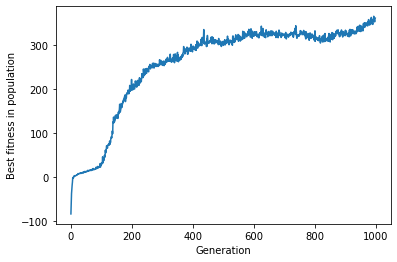

In [557]:
plt.plot(best_g_fitness)
plt.xlabel("Generation")
plt.ylabel("Best fitness in population")
#plt.xticks([0,100,200,300,400,500,600,700,800,900,1000])
plt.show()